In [1]:
%load_ext autoreload
%autoreload 2
from simulator import Simulation, Simulation_soil
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plot_overview(T,nT,Ds,alphavals,Length,nx):
    x = np.linspace(0,T,nT)
    # fig, ax = plt.subplots()
    # ax.plot(x,np.array(Ds)*np.array(alphavals))
    fig, ax = plt.subplots()
    ax.plot(x,Ds)
    fig, ax = plt.subplots()
    ax.plot(x,alphavals)
    poss= [np.argmax(ns[50:]) for ns in n_xt]

    x = np.linspace(0,T,nT)
    y = np.array(poss)*Length/nx
    fit_coeffs = np.polyfit(x[3*nT//4:], y[3*nT//4:], 1)
    fit_line = np.polyval(fit_coeffs, x)

    # Plot data and linear fit
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.plot(x, fit_line, 'r--')
    ax.set_xlabel('t (h)')
    ax.set_ylabel('x ($mm$)')
    print(fit_coeffs[0])
    print(y[-1]/x[-1])

In [3]:

path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
plt.style.use('presentation.mplstyle')


In [4]:
affine_r = [0.00334669*1e-3, 1.09854485*1e-3]


In [5]:
%matplotlib widget

adaptation_rate = 8e-4*2
length_scaling = 1.8
Length = 140*length_scaling
nx = int(350*15//10*length_scaling/0.8)
T= int(400*1.5*1.5)
nT=int(500*1.8)
# nT=1000

C0=0.004
Pprice_ideal = 2.5
speed = 0.1
D = 0.055*1e-1/3
D2 = 3.6

Vmax = 3.25e-9 #ugP/um2/hour
Vmax = Vmax*1e6 #ugP.mm-2.hour-1
ylims = [(0,10),(0,4),(0,C0*1000*1.3)]
speed_aim = speed + 2*np.sqrt(0.039*D*3)
print(speed_aim)
speed_aim = 0.15
r = affine_r[0]*speed_aim*1000 + affine_r[1] 


sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=D2,
    D=D*3,
    ylims=ylims,
    r=r,
    speed_dens = 0.15
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2))
# plt.savefig(os.path.join(path_figure,f'FigureAnew.pdf'), transparent=True, bbox_inches='tight')


0.12929163703175361


0.13839191525605773
0.13087214225232854


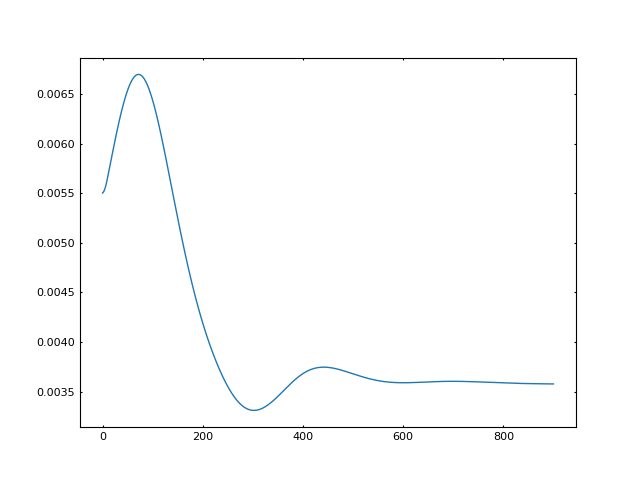

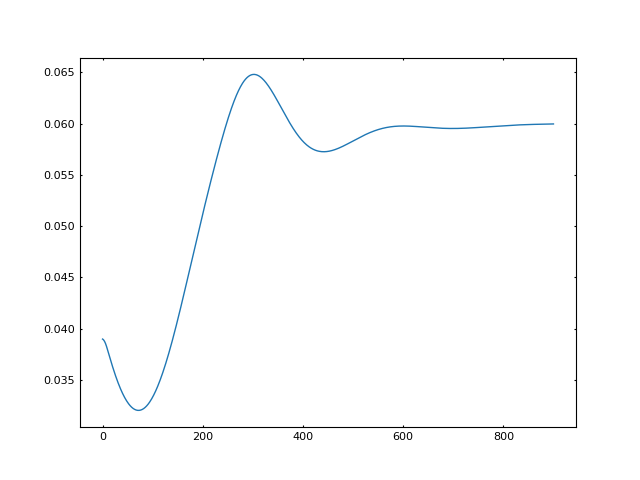

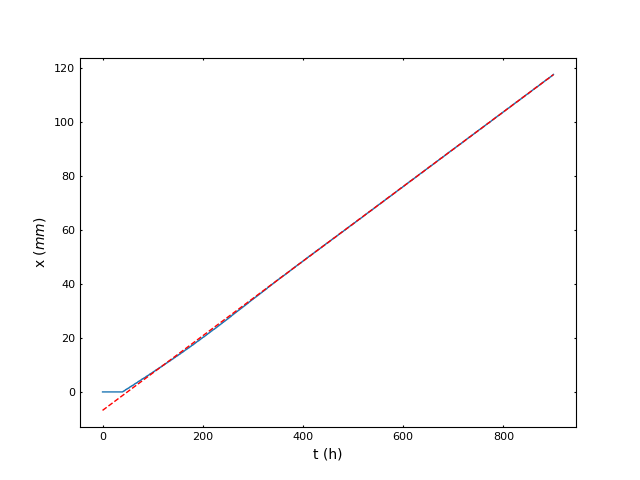

In [109]:
plot_overview(T,nT,Ds,alphavals,Length,nx)

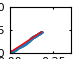

In [35]:
import numpy as np
import matplotlib.pyplot as plt
bp = 239
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1)*np.pi/2 #ug.h-1.mm-2

Pacquisitions *= 2*sim.r*np.pi #ug.h-1
Ccost = np.sum(n_xt*X*sim.dx*sim.v_sval,axis=1)*np.pi/2 #mm.h-1
Ccost *= np.pi*(sim.r)**2 #mm**3.h-1

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,1.5*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

ax.set_ylabel('$\Phi_C$  \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h$)')
ax.set_ylim(0,1)
ax.set_xlim(0,0.35)

plt.savefig(os.path.join(path_figure,f'FigureAsub.pdf'), transparent=True, bbox_inches='tight')

# ax.set_ylabel('$\Phi_C$')
# ax.set_xlabel('$\Phi_P$')
# ax.set_xlim(0,0.1)


Simulating:   0%|          | 0/900 [00:00<?, ?it/s]

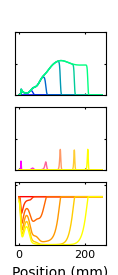

In [36]:
%matplotlib widget

speed = 0.18
speed_aim = speed + 2*np.sqrt(0.039*D)
speed_aim = 0.24

# r = r0 * (speed_aim/0.25)**(drag)
r = affine_r[0]*speed_aim*1000 + affine_r[1] 

sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=D2,
    D=D,
    ylims=ylims,
    r=r,
    speed_dens = speed_aim
    
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2),remove_ylabels=True)
plt.savefig(os.path.join(path_figure,f'FigureBnew.pdf'), transparent=True, bbox_inches='tight')


0.23033957273347186
0.23281964436917868


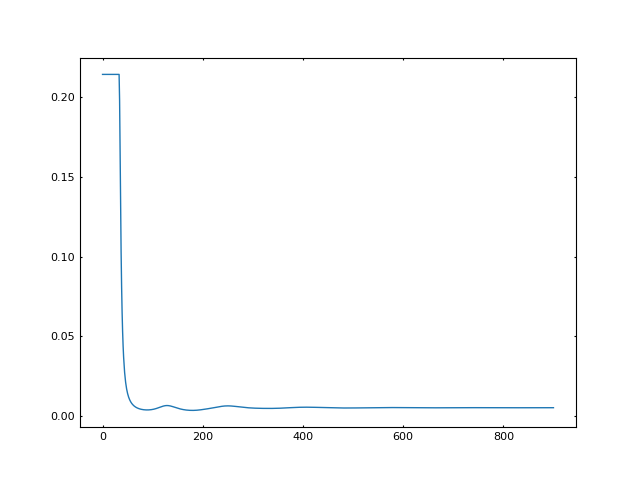

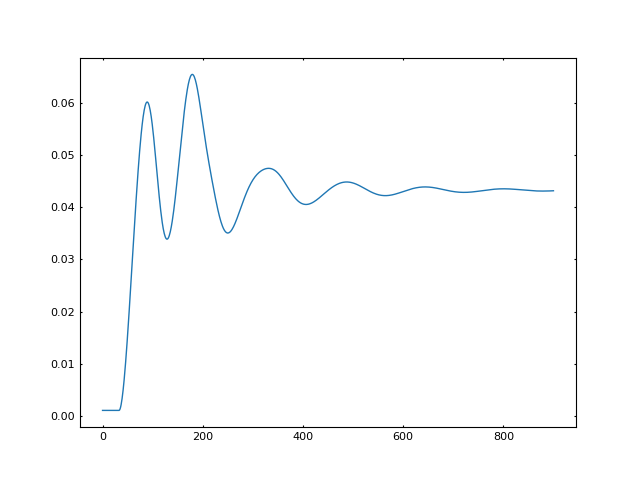

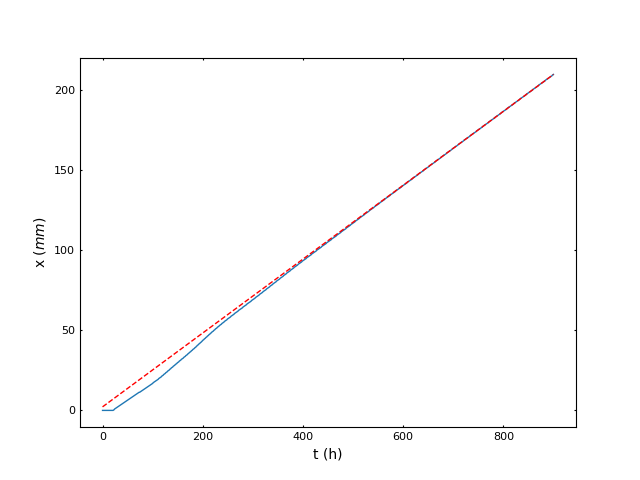

In [56]:
plot_overview(T,nT,Ds,alphavals,Length,nx)

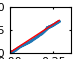

In [37]:
import numpy as np
import matplotlib.pyplot as plt
bp = 239
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1)*np.pi/2 #ug.h-1.mm-2

Pacquisitions *= 2*sim.r*np.pi #ug.h-1
Ccost = np.sum(n_xt*X*sim.dx*sim.v_sval,axis=1)*np.pi/2 #mm.h-1
Ccost *= np.pi*(sim.r)**2 #mm**3.h-1

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,1.5*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

# ax.set_ylabel('$\Phi_C$  \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h$)')
ax.set_ylim(0,1)
ax.set_xlim(0,0.35)

plt.savefig(os.path.join(path_figure,f'FigureBsub.pdf'), transparent=True, bbox_inches='tight')


0.16691153452528776


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

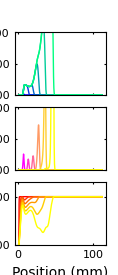

0.1647052424345624


In [124]:
plt.close("all")
bp = 239

adaptation_rate = 8e-4*100

length_scaling = 0.8
Length = 140*length_scaling
nx = int(350*15//10*length_scaling/0.8)
T= int(200)
nT=int(200)
C0 = 0.02
ylims = [(0,10),(0,4),(0,C0*1000*1.3)]
# speed_aim = 0.18
# speed = get_base_speed(C0, speed_aim)
# speed = speed_aim
speed = 0.15
speed_aim = speed + 2*np.sqrt(0.039*D)
print(speed_aim)
D2 = 3.6
r = affine_r[0]*speed_aim*1000 + affine_r[1] 
sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=D2,
    D=D,
    ylims=ylims,
    r=r,
    speed_dens = 0.15
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2))
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
Pacquisitions = np.pi*np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-1
Pacquisitions *= 2*sim.r*np.pi
print(np.mean(Pacquisitions))

In [123]:
print(np.mean(Pacquisitions))

0.1335124228179148


0.24671859143657449
0.1685333333333333


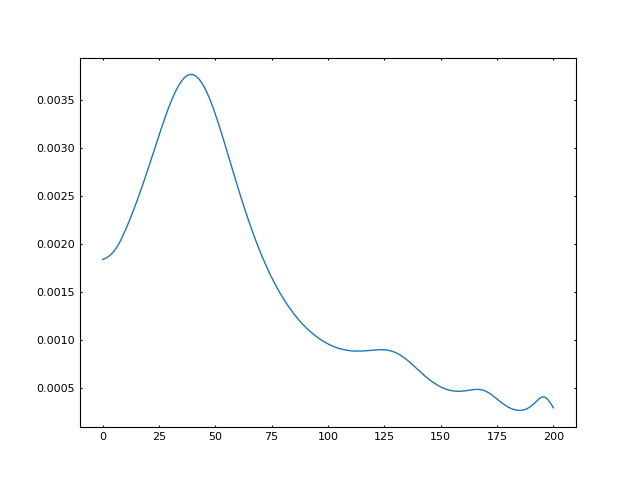

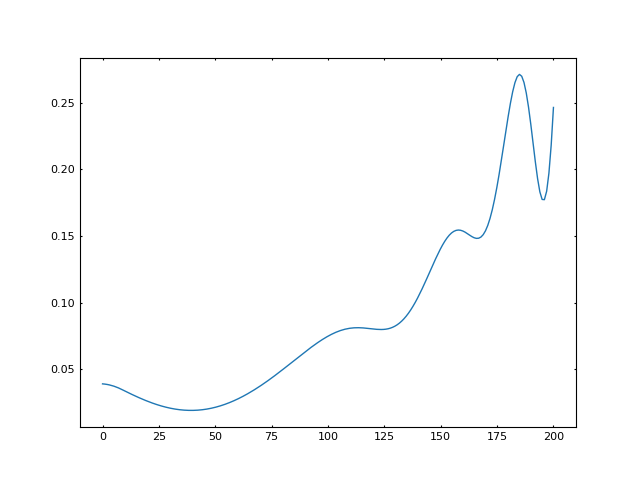

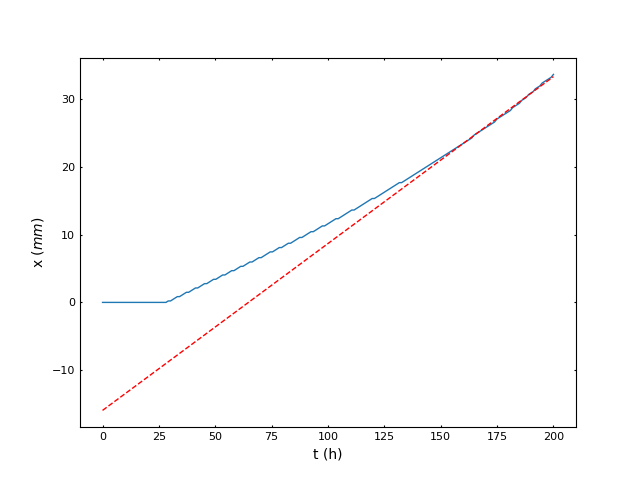

In [120]:
plot_overview(T,nT,Ds,alphavals,Length,nx)

0.01099099802550481


Text(0.5, 0, '$\\Phi_P$ ($\\mu g/h$)')

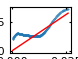

In [89]:
bp = 239

C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.pi*np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-2

Pacquisitions *= 2*sim.r*np.pi #ug.h-1
print(np.mean(Pacquisitions))
Ccost = np.pi*np.sum(n_xt*X*sim.dx*sim.s_scal,axis=1) #mm.h-1
Ccost *= np.pi*(sim.r)**2 #mm**3.h-1

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,1.5*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

# ax.set_ylabel('$\Phi_C$  \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h$)')


0.23591336192803689


Text(0.5, 0, '$\\Phi_P$ ($\\mu g/h$)')

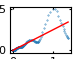

In [45]:
bp = 239

C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.pi*np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-2

Pacquisitions *= 2*sim.r*np.pi #ug.h-1
print(np.mean(Pacquisitions))
Ccost = np.pi*np.sum(n_xt*X*sim.dx*sim.s_scal,axis=1) #mm.h-1
Ccost *= np.pi*(sim.r)**2 #mm**3.h-1

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,1.5*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

# ax.set_ylabel('$\Phi_C$  \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h$)')


In [101]:
maxC0 = 0.02
def get_dynamics(speed,C0,Pprice_ideal = Pprice_ideal,D = D,speed_aim=False):
    # if not speed_aim:
    speed_aim = speed + 2*np.sqrt(0.039*D)
    r = affine_r[0]*speed_aim*1000 + affine_r[1] 
    sim = Simulation_soil(
        Length,
        nx,
        T,
        nT,
        speed=speed,
        C0=C0,
        Pprice_ideal=Pprice_ideal,
        Fmax=Vmax,
        adaptation_rate=adaptation_rate,
        D2=D2,
        D=D,
        ylims=ylims,
        r=r,
        speed_dens = 0.15
    )
    C_xt, rho_xt, n_xt,P_prices,_,_ = sim.integrate(plot=False,plot_axes = (0,1,2))
    poss = np.argmax(n_xt,axis=1)
    x = np.linspace(0,sim.T,sim.nT)
    y = np.array(poss)*sim.Length/sim.nx
    fit_coeffs = np.polyfit(x[3*sim.nT//4:], y[3*sim.nT//4:], 1)
    slope = y[-1]/x[-1]
    C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
    Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-1
    Pacquisitions *= 2*sim.r*np.pi
    print(np.mean(Pacquisitions))
    return(np.mean(Pacquisitions),slope)



In [36]:
def get_associated_speeds(speeds,C0):
    C0_values = [C0]
    dynamics = {(speed_aim, C0): get_dynamics(speed_aim, C0=C0, Pprice_ideal=Pprice_ideal,D=D,speed_aim = speed_aim) 
            for C0 in C0_values for speed_aim in speeds}
    speed_transformed = [dynamic[-1] for dynamic in dynamics.values()]
    return(speed_transformed)

In [39]:
import numpy as np
from scipy.interpolate import interp1d
base_speeds = np.linspace(0.10, 0.30, 3)

C0_speeds = {
    C0 : get_associated_speeds(base_speeds,C0) for C0 in 
    np.exp(np.linspace(np.log(0.001), np.log(maxC0),5))
}


# Convert the dictionary into arrays for interpolation
C0_vals = np.array(sorted(C0_speeds.keys()))  # shape (3,)
speed_matrix = np.array([C0_speeds[C0] for C0 in C0_vals])  # shape (3, 5)

def get_full_mapped_interval(C0_target):
    # Interpolate each column (i.e., each base_speed) across C0
    mapped = []
    for i in range(speed_matrix.shape[1]):
        f = interp1d(C0_vals, speed_matrix[:, i], kind='linear', fill_value='extrapolate')
        mapped.append(f(C0_target))
    return np.array(mapped)

def get_scaled_speed(C0_target, base_speed):
    mapped_interval = get_full_mapped_interval(C0_target)
    # Interpolate within the mapped_interval to get the mapped speed
    f = interp1d(base_speeds, mapped_interval, kind='linear', fill_value='extrapolate')
    return f(base_speed)

def get_base_speed(C0_target, mapped_speed):
    mapped_interval = get_full_mapped_interval(C0_target)
    # Invert the mapping
    f = interp1d(mapped_interval, base_speeds, kind='linear', fill_value='extrapolate')
    return f(mapped_speed)




0.1


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.2


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.1


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.2


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.1


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.2


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.1


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.2


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.1


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.2


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/240 [00:00<?, ?it/s]

In [44]:
# Example usage
C0_target = 0.01
target_speed = 0.15

result = get_base_speed(C0_target, target_speed)
print(f'For C0 = {C0_target}, base speed = {result:.4f}')

For C0 = 0.01, base speed = 0.0492


In [107]:
n =20
speeds_aim = np.linspace(0.15,0.32,n)
C0_values = np.exp(np.linspace(np.log(0.002), np.log(maxC0),n))  # Adjust the number of points as needed
# speeds_aim = [0.1]

# C0_values = [0.06]
# dynamics = {(speed, C0): get_dynamics(speed, C0=C0, Pprice_ideal=2*(0.02/C0),D=D) 
#             for C0 in C0_values for speed in speeds}
# dynamics = {(speed_aim, C0): get_dynamics(get_base_speed(C0,speed_aim), C0=C0, Pprice_ideal=Pprice_ideal,D=D,speed_aim = speed_aim) 
#             for C0 in C0_values for speed_aim in speeds_aim}
dynamics = {(speed_aim, C0): get_dynamics(speed_aim, C0=C0, Pprice_ideal=Pprice_ideal,D=D) 
            for C0 in C0_values for speed_aim in speeds_aim}

Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0021141763519163023


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.002212292885767891


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0023072036702546667


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.002398707618054311


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0024868437494048098


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0025717910699003077


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.00265336214497076


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0027320271862457278


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.002807805606878496


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0028807804467318237


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0029512945444280236


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0030193927751232907


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0030853652270632493


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.003149178448396772


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.003211261625787167


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0032716731876665495


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.003330430154087377


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0033877220015846236


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.0034438687662074153


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0034985433305447055


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0025063100551150287


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0026186216863307702


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0027260738962297504


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.00282887730439231


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0029269846260039623


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0030207471122037323


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0031101494981604816


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003195573733371563


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0032771342118980756


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003355273992649135


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0034301329450953004


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003501938569650734


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0035710674217881667


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0036376751278504437


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0037019557012715185


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0037641200969817067


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0038242691325228633


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003882863623406426


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.00393976632125258


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003995237510585455


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.002994023310457834


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0031218853338451326


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0032434896357008526


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0033583802042010304


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0034671507513260908


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0035699182020291955


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0036671360028334298


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0037591032682052807


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003846330011815294


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003929102068568362


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004007707092348538


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0040825748829084645


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0041541219139054715


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004222658927298369


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.00428837666241098


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004351523378753674


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004412546523159964


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004471513005710696


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004528413968964064


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004583988211359954


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0036540537638874693


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003740205819414375


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003869982753508244


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.003998063954309214


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004117483275460205


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004229301630164725


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004333982483614699


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004432025591689839


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004524153865902653


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0046105956667960015


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004692046141059584


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004768956568689654


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004841727014485851


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.00491126631739474


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004977783242941511


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0050414274983876265


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005102354476819373


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0051606799077921804


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005217069974550142


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005271516523561962


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004454784040477459


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004549659316402463


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.004633263006528228


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.00475827925000731


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0048896029131429075


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005010346589429306


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0051218994192297074


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005225416225734954


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005321508568948651


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005410689171674285


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0054938818263385505


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005571443147883412


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005644073149616747


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005713529448755078


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005779955903851964


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005842883539030342


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0059025313220799945


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005959608859903464


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006014128272913056


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006066079999438061


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005412068002456042


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005524508070281164


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005613865946162992


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005687734130307844


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.005800064728171831


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0059310756577035505


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006049826028959433


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006158238052826649


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006257291895909996


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006347912847158057


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006431222317241105


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006507831553316019


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006578521553126


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006645829807985475


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006711140543518601


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006772302159206417


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0068296872604198125


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006883718759436949


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006934481981920709


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0069826690432172375


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006560394336901167


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006696390237610458


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006800418465823801


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.006876662290618895


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.00693302203131415


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007023956455213448


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0071518007055619915


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007265248109080187


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007366943070063217


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007457767644058342


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007539706710561526


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007613383842188664


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0076797418950748965


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007741302453907672


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007804002491202682


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007861349890682207


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007913839200189555


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007961847759634766


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008006287639619329


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008047869971256954


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.007946031205166716


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008114660842335695


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.00824163250610107


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008330680493475367


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008386903697912602


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008419082735890501


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008482388129853757


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008603971786194464


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008708043774068927


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008798675984148442


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.008876907128125569


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.00894528371435


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009004238925359627


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009055293774665293


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009110771877437765


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009160089152139464


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009203194009760834


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009240981822508501


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009274626056011724


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009303988768159757


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009610513637833723


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.00982319691055803


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.009983398531055865


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010094966689911103


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010162777680759514


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010193190156071195


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010196747597871113


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010231545900410383


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010341238332001299


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010430338955623114


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010503070315208392


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010562437613231088


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010609779269849018


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01064816296343935


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010686658190775656


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010721227387711897


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010748357803953328


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010768828727521431


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010784034714001


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.010795154644270399


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.011572180581423851


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01183696223891254


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01203706434204563


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01217691501151255


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012261955293565304


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012298617839657099


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012294949865783505


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012264234304478644


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012271993030741947


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01236184769883486


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01242710652784161


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012474712791405685


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01250734826239894


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012528209858737238


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01254376504282527


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012557283194483763


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012561183616101881


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012557954050492313


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012548643462337559


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.012534508050374739


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.013833188346142571


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014150821147834445


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014389431829632362


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014554649960404353


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014653211939072186


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01469265528529485


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014681324069853195


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01463088609453818


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014562075800352221


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014550046772170012


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014613926337657648


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014650831061858218


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01466777978247747


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014670640186112947


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014662552573241026


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014650064446577982


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014625976056938874


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01459403629085028


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014554833189655971


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.014510070053295016


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0164086740085418


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.016774897907569118


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.017044229404432815


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.017224150529482972


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.017323557487838176


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01735216148199785


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.017320097392600094


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01723828549001159


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01714201577997037


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.017036101863861453


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.017015355479003916


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.017048212345550994


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01705383679268066


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01703883531920744


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01700994959832062


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.016968658786380927


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01691386459834031


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.016849114418063922


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.016776530373399937


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01669744586205159


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01935221208418068


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01976582428929856


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.020059157882763645


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.020241401528759386


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.020323959303797316


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.020319684988330776


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.020242148890915884


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02010525055326527


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.019959835382246226


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01981163057191303


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.019665686308387328


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.019637167215506658


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.019634919327434046


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.019603396874467473


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0195521763916499


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.019486505519684293


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01939730259243076


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01929610183451739


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.019186514022785886


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.01906983885887096


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.022753927875311844


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.023229200859477918


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.023556481537108515


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.023744874844480214


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.023806202632194823


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0237545557978491


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02360595089812489


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0233781612629177


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02312788532777418


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02291542117794891


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.022681494754995386


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.022474016738921576


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.022424790710831193


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.022371291005969435


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.022291412343933868


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02219797930137655


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02206900234196727


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.021925317333716117


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02177072478102934


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02160797945318997


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.026678784397241414


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.027240489228387347


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.027628685926737232


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.027852714010857337


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.027923896697024903


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02785486175175573


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.027659274801686687


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.027352216528245713


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02696070422390584


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.026636197215683145


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.026258159848790076


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02586998804522496


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.025551904518274045


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.025444040223096057


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.025309008889640144


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.025156930083102633


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.024975622893414404


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02476997278671825


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.024554091164431698


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.024334103660066334


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.031096186313037785


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03174547103632863


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03219869335694361


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03246921001553067


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03257207899984624


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03252311031881306


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03233396234074947


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03201740607393169


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.031589545866258145


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.031156139322468607


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.030618761998646202


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.030031258719321732


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.029450403486498584


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.029026051554901466


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.028791371255863344


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.028523362994151737


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02824687063622983


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02794060581153709


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.027627167890171833


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.02731502965023707


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03591550951008068


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03661634067617854


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03709877983363031


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03738544983042604


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03751201395610539


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03749001826874958


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03733447888100701


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03704820820584642


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03664159211082529


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.036183295691327305


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.035544215563712483


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03480744494395455


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.034031633950041024


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03329554172172588


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.032827781822554546


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03242868571047179


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03201251412794123


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03156583096726753


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03111505597911868


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03066644337121245


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.041066427378889915


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.041759452237878775


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04221089129814271


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.042458087719252316


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04258954239520153


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04258814368039705


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04246925184901678


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.042225742047293534


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04186433911460898


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04146107772036535


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04075387619339403


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03990943619386802


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.038995635073158466


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03807303769073501


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0372591608688562


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03674299248320885


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.036195941797971934


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03559239078641761


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.034985977319300546


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.03438557647132691


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04654205912530947


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04716012317570675


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04750351711846994


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0476338218923261


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.047732941634914205


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04774091643447607


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04763065146787897


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04741984262028895


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04712068795233906


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.046810045662822715


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.046070449310448625


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.045172420661563954


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04412002270743258


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04305167937172543


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04202919789447038


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04129210647043837


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.040637409549218795


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.0398957995846249


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.039124803347507384


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.038366496747828


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.05242870049004842


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.052938115985218505


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.05310471210444552


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.05300834776805575


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.05301815290330281


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.05296734830273936


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.05283522286902689


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.05262180888818226


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.052325360870582885


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.052017562847552795


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.05140900371038223


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.050376597761102995


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04929045892698805


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04811323398968005


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.046930019755397866


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04590371757479377


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04516981260509022


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04434559098774396


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.04341217166926265


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

0.042499035298289724


In [108]:
bp = 239
X = np.linspace(1, Length, nx)
dx = Length/nx
Pacqu = {}

for speed in speeds_aim:
    for C0 in C0_values:
        Pacquis,speed_observed = dynamics[(speed,C0)]
        # Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-1
        # Pacquisitions *= 2*sim.r*np.pi
        Pacqu[(speed,speed_observed,C0)] = Pacquis

In [109]:
import pandas as pd

# Your existing code
# X, dx, Pacqu, etc.

# Convert your data into a list of dictionaries
data_for_df = []
for key, value in Pacqu.items():
    speed_imposed,speed_observed, C0 = key
    data_for_df.append({'speed_imposed': speed_imposed,'speed_observed': speed_observed, 'C0': C0, 'MeanPacquisition': value})

# Create DataFrame
df = pd.DataFrame(data_for_df)

# Display the DataFrame


df.to_csv('speedC0.csv')

average_p_rate = df.groupby('C0')['MeanPacquisition'].mean()

# Merge the averages back into the original DataFrame
df['average_P_rate'] = df['C0'].map(average_p_rate)
df['normalized_P_rate'] = df['MeanPacquisition']/df['average_P_rate']


def to_two_significant_digits(x):
    return float(f'{x:.2g}')

def to_three_significant_digits(x):
    return float(f'{x:.2g}')

# Create new columns with values formatted to two significant digits
df['speed_imposed'] = (df['speed_imposed'].apply(to_two_significant_digits)*1000).astype(int)
df['speed_observed'] = (df['speed_observed'].apply(to_two_significant_digits)*1000).astype(int)

df['C0'] = ((df['C0']*1000).apply(to_three_significant_digits))



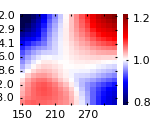

In [110]:
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
cm = 1/2.54  # centimeters in inches

import seaborn as sns
from matplotlib.ticker import FuncFormatter
fig,ax = plt.subplots(figsize = (4*cm,3*cm))

pivot_df = df.pivot_table(index='C0', columns='speed_imposed', values='normalized_P_rate')
max_value = pivot_df.abs().max().max()  # Find the maximum absolute value
vmin, vmax = 2-max_value, max_value  # Set vmin and vmax for the colorbar

# Create the heatmap with symmetric colorbar
sns.heatmap(pivot_df, annot=False, cmap="seismic", ax=ax, vmin=vmin, vmax=vmax)

# sns.heatmap(pivot_df, annot=False, cmap="YlGnBu",cbar_kws={'label': 'relative \n P transfer'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

n = 2  # Set n to desired interval
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
# n = 2  # Set n to desired interval
# for index, label in enumerate(ax.yaxis.get_ticklabels()):
#     if index % n != 0:
        # label.set_visible(False)
ax.set_xlabel('$v_{wave}$ ($\mu m/h$)')
ax.set_ylabel('$[P]_{0}$ \n ($n g/mm^3$)')
# plt.tight_layout()
plt.savefig(os.path.join(path_figure,'Figure4modelB_new.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
cm = 1/2.54  # centimeters in inches

import seaborn as sns
from matplotlib.ticker import FuncFormatter
fig,ax = plt.subplots(figsize = (4*cm,3*cm))

pivot_df = df.pivot_table(index='C0', columns='speed_imposed', values='normalized_P_rate')
max_value = pivot_df.abs().max().max()  # Find the maximum absolute value
vmin, vmax = 2-max_value, max_value  # Set vmin and vmax for the colorbar

# Create the heatmap with symmetric colorbar
sns.heatmap(pivot_df, annot=False, cmap="seismic", ax=ax, vmin=vmin, vmax=vmax)

# sns.heatmap(pivot_df, annot=False, cmap="YlGnBu",cbar_kws={'label': 'relative \n P transfer'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

n = 2  # Set n to desired interval
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
# n = 2  # Set n to desired interval
# for index, label in enumerate(ax.yaxis.get_ticklabels()):
#     if index % n != 0:
        # label.set_visible(False)
ax.set_xlabel('$v_{wave}$ ($\mu m/h$)')
ax.set_ylabel('$[P]_{0}$ \n ($n g/mm^3$)')
# plt.tight_layout()
# plt.savefig(os.path.join(path_figure,'Figure4modelB_new.pdf'), transparent=True, bbox_inches='tight')


In [64]:
length_scaling = 1
Length = 140*length_scaling
nx = int(350*15//10*length_scaling/0.8)
T= int(340)
nT=int(340)
speeds_aim = np.linspace(0.18,0.30,5)
def get_dynamics(speed,C0,Pprice_ideal = Pprice_ideal,D = D,speed_aim=False):
    if not speed_aim:
        speed_aim = speed + 2*np.sqrt(0.039*D)
    print(speed_aim)
    r = affine_r[0]*speed_aim*1000 + affine_r[1] 
    sim = Simulation_soil(
        Length,
        nx,
        T,
        nT,
        speed=speed,
        C0=C0,
        Pprice_ideal=Pprice_ideal,
        Fmax=Vmax,
        adaptation_rate=adaptation_rate,
        D2=D2,
        D=D,
        ylims=ylims,
        r=r
    )
    C_xt, rho_xt, n_xt,P_prices,_,_ = sim.integrate(plot=False,plot_axes = (0,1,2))
    poss = np.argmax(n_xt,axis=1)
    x = np.linspace(0,sim.T,sim.nT)
    y = np.array(poss)*sim.Length/sim.nx
    fit_coeffs = np.polyfit(x[3*sim.nT//4:], y[3*sim.nT//4:], 1)
    slope = y[-1]/x[-1]
    # return(np.array(C_xt),np.array(rho_xt),np.array(n_xt),fit_coeffs[0])
    return(np.array(C_xt),np.array(rho_xt),np.array(n_xt),slope)


0.18


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.21


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.24


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.27


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.18


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.21


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.24


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.27


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.18


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.21


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.24


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.27


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.18


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.21


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.24


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.27


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.18


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.21


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.24


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.27


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

0.3


Simulating:   0%|          | 0/340 [00:00<?, ?it/s]

In [ ]:


dynamics = {(speed_aim, C0): get_dynamics(get_base_speed(C0,speed_aim), C0=C0, Pprice_ideal=Pprice_ideal,D=D,speed_aim = speed_aim) 
            for C0 in C0_values for speed_aim in speeds_aim}


Text(-0.7316272965879307, 0.5, '$[P]_{0}$ \n ($n g/mm^3$)')

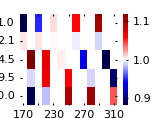

In [66]:
bp = 239
X = np.linspace(1, Length, nx)
dx = Length/nx
Pacqu = {}

for speed in speeds_aim:
    for C0 in C0_values:
        C_xt, rho_xt, n_xt,speed_observed = dynamics[(speed,C0)]
        Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-1
        Pacquisitions *= 2*sim.r*np.pi
        Pacqu[(speed,speed_observed,C0)] = np.mean(Pacquisitions)
import pandas as pd

# Your existing code
# X, dx, Pacqu, etc.

# Convert your data into a list of dictionaries
data_for_df = []
for key, value in Pacqu.items():
    speed_imposed,speed_observed, C0 = key
    data_for_df.append({'speed_imposed': speed_imposed,'speed_observed': speed_observed, 'C0': C0, 'MeanPacquisition': value})

# Create DataFrame
df = pd.DataFrame(data_for_df)

# Display the DataFrame


df.to_csv('speedC0.csv')

average_p_rate = df.groupby('C0')['MeanPacquisition'].mean()

# Merge the averages back into the original DataFrame
df['average_P_rate'] = df['C0'].map(average_p_rate)
df['normalized_P_rate'] = df['MeanPacquisition']/df['average_P_rate']


def to_two_significant_digits(x):
    return float(f'{x:.2g}')

def to_three_significant_digits(x):
    return float(f'{x:.2g}')

# Create new columns with values formatted to two significant digits
df['speed_imposed'] = (df['speed_imposed'].apply(to_two_significant_digits)*1000).astype(int)
df['speed_observed'] = (df['speed_observed'].apply(to_two_significant_digits)*1000).astype(int)

df['C0'] = ((df['C0']*1000).apply(to_three_significant_digits))

path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
cm = 1/2.54  # centimeters in inches

import seaborn as sns
from matplotlib.ticker import FuncFormatter
fig,ax = plt.subplots(figsize = (4*cm,3*cm))

pivot_df = df.pivot_table(index='C0', columns='speed_observed', values='normalized_P_rate')
max_value = pivot_df.abs().max().max()  # Find the maximum absolute value
vmin, vmax = 2-max_value, max_value  # Set vmin and vmax for the colorbar

# Create the heatmap with symmetric colorbar
sns.heatmap(pivot_df, annot=False, cmap="seismic", ax=ax, vmin=vmin, vmax=vmax)

# sns.heatmap(pivot_df, annot=False, cmap="YlGnBu",cbar_kws={'label': 'relative \n P transfer'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

n = 2  # Set n to desired interval
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
# n = 2  # Set n to desired interval
# for index, label in enumerate(ax.yaxis.get_ticklabels()):
#     if index % n != 0:
        # label.set_visible(False)
ax.set_xlabel('$v_{wave}$ ($\mu m/h$)')
ax.set_ylabel('$[P]_{0}$ \n ($n g/mm^3$)')
# plt.tight_layout()
# plt.savefig(os.path.join(path_figure,'Figure4modelB_new.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
cm = 1/2.54  # centimeters in inches

import seaborn as sns
from matplotlib.ticker import FuncFormatter
fig,ax = plt.subplots(figsize = (4*cm,3*cm))

pivot_df = df.pivot_table(index='C0', columns='speed_imposed', values='normalized_P_rate')
max_value = pivot_df.abs().max().max()  # Find the maximum absolute value
vmin, vmax = 2-max_value, max_value  # Set vmin and vmax for the colorbar

# Create the heatmap with symmetric colorbar
sns.heatmap(pivot_df, annot=False, cmap="seismic", ax=ax, vmin=vmin, vmax=vmax)

# sns.heatmap(pivot_df, annot=False, cmap="YlGnBu",cbar_kws={'label': 'relative \n P transfer'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

n = 2  # Set n to desired interval
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
# n = 2  # Set n to desired interval
# for index, label in enumerate(ax.yaxis.get_ticklabels()):
#     if index % n != 0:
        # label.set_visible(False)
ax.set_xlabel('$v_{wave}$ ($\mu m/h$)')
ax.set_ylabel('$[P]_{0}$ \n ($n g/mm^3$)')
# plt.tight_layout()
# plt.savefig(os.path.join(path_figure,'Figure4modelB_new.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
zbr

In [ ]:
Pprice_ideal

In [ ]:
%matplotlib widget

adaptation_rate = 8e-3
length_scaling = 1.2
Length = 140*length_scaling
nx = int(350*15//10*length_scaling/0.8)
T= int(400*1.5)
nT=int(600*1.5)
C0=0.002
Pprice_ideal = 2
speed = 0.12
D = 0.055

Vmax = 3.25e-9 #ugP/um2/hour
Vmax = Vmax*1e6 #ugP.mm-2.hour-1
ylims = [(0,12),(0,8),(0,C0*1000*1.3)]
speed_aim = speed + 2*np.sqrt(0.039*D)
# speed_aim = 0.17
print(speed_aim)
drag = 1
r0 = 3e-3#mm 
r = r0 * (speed_aim/0.25)**(drag)

sim = Simulation_soil(
    Length,
    nx,
    T,
    nT,
    speed=speed,
    C0=C0,
    Pprice_ideal=Pprice_ideal,
    Fmax=Vmax,
    adaptation_rate=adaptation_rate,
    D2=3.6,
    D=D,
    ylims=ylims,
    r=r
)
C_xt, rho_xt, n_xt,P_prices,alphavals,Ds = sim.integrate(plot=True,plot_axes = (0,1,2))
# plt.savefig(os.path.join(path_figure,f'FigureAnew.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
np.sqrt(0.001*0.1)

In [ ]:
x = np.linspace(0,T,nT)
fig, ax = plt.subplots()
ax.plot(x,Ds)

In [ ]:
x = np.linspace(0,T,nT)
fig, ax = plt.subplots()
ax.plot(x,alphavals)

In [ ]:
poss= [np.argmax(ns[50:]) for ns in n_xt]

x = np.linspace(0,T,nT)
y = np.array(poss)*Length/nx
fit_coeffs = np.polyfit(x[3*nT//4:], y[3*nT//4:], 1)
fit_line = np.polyval(fit_coeffs, x)

# Plot data and linear fit
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, fit_line, 'r--')
ax.set_xlabel('t (h)')
ax.set_ylabel('x ($mm$)')
print(fit_coeffs[0])

In [ ]:
drag = 1


In [ ]:
plt.close("all")

speeds = np.linspace(0.10,0.26,5)
C0_values = np.exp(np.linspace(np.log(0.001), np.log(0.01), 5))  # Adjust the number of points as needed

dynamics = {(speed, C0): get_dynamics(speed, C0=C0, Pprice_ideal=2*(0.02/C0)**(1/1.2)) 
            for C0 in C0_values for speed in speeds}

In [ ]:
X = np.linspace(1, Length, nx)
dx = Length/nx
Pacqu = {}

for speed in speeds:
    for C0 in C0_values:
        C_xt, rho_xt, n_xt,speed_observed = dynamics[(speed,C0)]
        Pacquisitions = np.sum(Vmax*(C_xt/bp/(C_xt/bp+sim.Kp))*rho_xt*X*sim.dx,axis=1) #ug.h-1.mm-1
        Pacquisitions *= 2*sim.r0*np.pi
        Pacqu[(speed_observed,C0)] = np.mean(Pacquisitions)

In [ ]:
import pandas as pd

# Your existing code
# X, dx, Pacqu, etc.

# Convert your data into a list of dictionaries
data_for_df = []
for key, value in Pacqu.items():
    speed, C0 = key
    data_for_df.append({'speed': speed, 'C0': C0, 'MeanPacquisition': value})

# Create DataFrame
df = pd.DataFrame(data_for_df)

# Display the DataFrame


df.to_csv('speedC0.csv')

average_p_rate = df.groupby('C0')['MeanPacquisition'].mean()

# Merge the averages back into the original DataFrame
df['average_P_rate'] = df['C0'].map(average_p_rate)
df['normalized_P_rate'] = df['MeanPacquisition']/df['average_P_rate']


def to_two_significant_digits(x):
    return float(f'{x:.2g}')

# Create new columns with values formatted to two significant digits
df['speed'] = (df['speed'].apply(to_two_significant_digits)*1000).astype(int)
df['C0'] = (df['C0'].apply(to_two_significant_digits)*1000).astype(int)



In [ ]:
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig5"
cm = 1/2.54  # centimeters in inches

import seaborn as sns
from matplotlib.ticker import FuncFormatter
fig,ax = plt.subplots(figsize = (4*cm,3*cm))

pivot_df = df.pivot_table(index='C0', columns='speed', values='normalized_P_rate')
max_value = pivot_df.abs().max().max()  # Find the maximum absolute value
vmin, vmax = 2-max_value, max_value  # Set vmin and vmax for the colorbar

# Create the heatmap with symmetric colorbar
sns.heatmap(pivot_df, annot=False, cmap="seismic", ax=ax, vmin=vmin, vmax=vmax)

# sns.heatmap(pivot_df, annot=False, cmap="YlGnBu",cbar_kws={'label': 'relative \n P transfer'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

n = 2  # Set n to desired interval
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)
# n = 2  # Set n to desired interval
# for index, label in enumerate(ax.yaxis.get_ticklabels()):
#     if index % n != 0:
        # label.set_visible(False)
ax.set_xlabel('$v_{wave}$ ($\mu m/h$)')
ax.set_ylabel('$[P]_{0}$ \n ($n g/mm^3$)')
# plt.tight_layout()
# plt.savefig(os.path.join(path_figure,'Figure4modelB.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
plt.savefig(os.path.join(path_figure,f'FigureAnew.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
C_xt, rho_xt, n_xt = np.array(C_xt),np.array(rho_xt),np.array(n_xt)
X = np.linspace(1, sim.Length, sim.nx)
Pacquisitions = np.sum(Vmax*(C_xt/(C_xt+sim.Kp))*rho_xt*X*sim.dx,axis=1)*np.pi/2 #ug.h-1.mm-2

Pacquisitions *= 2*sim.r0*np.pi #ug.h-1
Ccost = np.sum(n_xt*X*sim.dx*sim.v_sval,axis=1)*np.pi/2 #mm.h-1
Ccost *= np.pi*(sim.r0)**2 #mm**3.h-1
Ccost *= (sim.v_sval/0.25)**(sim.speed_penalty)

Ccost *= 0.5*0.21*1.1 *1e-3 #g.mm-1.h-1
Ccost *= 1e6 #ug.mm-1.h-1
Ccost *= 2 #respiration


In [ ]:
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,2*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
# ax.plot([0,0.2],[0,0.2*Pprice_ideal],color="red")

ax.set_ylabel('$\Phi_C$ \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ \n($\mu g/h$)')
# ax.set_ylabel('$\Phi_C$')
# ax.set_xlabel('$\Phi_P$')
ax.set_xlim(0,0.1)
ax.set_ylim(0,0.3)
# plt.savefig(os.path.join(path_figure,f'FigureBnew.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
Pprice_ideal = 3
speed = 0.26
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True,remove_ylabels = True)

In [ ]:
plt.savefig(os.path.join(path_figure,f'FigureA2new.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (2*cm,2*cm))
ax.scatter(Pacquisitions,Ccost,s=0.11)
ax.plot(Pacquisitions,Pacquisitions*Pprice_ideal,color="red")
ax.set_ylabel('$\Phi_C$ \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ \n ($\mu g/h$)')
ax.set_ylabel('')
# ax.set_xlabel('$\Phi_P$')
ax.set_xlim(0,0.1)
ax.set_ylim(0,0.3)

ax.set_yticklabels([])

plt.savefig(os.path.join(path_figure,f'FigureB2new.pdf'), transparent=True, bbox_inches='tight')


In [ ]:
Km = 1e-3#umol/cm3
Km *= 31 #ug/cm3
Km *=1e-3 #ug/mm3
Km_snchepf = Km 

Km*1000
cm = 1/2.54  # centimeters in inches
%matplotlib widget
from dolfin import *
import numpy as np
import matplotlib as mpl
import os
import matplotlib.ticker as ticker
Length = 140*0.4
nx = int(350*15//10*0.4/0.8)
plt.close("all")
set_log_active(False)
cmap3 = mpl.cm.get_cmap("autumn")
cmap4 = mpl.cm.get_cmap("summer")

class Simulation:
    """
    A class for simulating a finite element problem using the FEniCS framework.

    Attributes:
    -----------
    Length: float
        Length of the interval domain.
    nx: int
        Number of subdivisions in the mesh.
    nT: int
        Number of time steps.
    T: float
        Total simulation time.
    C0: float
        Initial concentration value.
    Fmax: float
        Maximum flux value.
    Pprice_ideal: float
        Ideal price value.
    width: float
        Width of the plot.
    height: float
        Height of the plot.
    """
    def __init__(self, Length=Length, nx=nx, nT=200, T=400, C0=10, Fmax=2, Pprice_ideal=20, width=3*cm, height=7*cm,speed = 0.230,adaptation_rate = 1e-4,drag = 0):
        self.Length = Length
        self.nx = nx
        self.dx = Length/nx
        self.nT = nT
        self.T = T
        self.dt = T/nT
        self.C0 = C0 #ug.mm-3
        self.Fmax = Fmax
        self.Pprice_ideal = Pprice_ideal
        self.width = width
        self.height = height
        self.speed = speed
        self.adaptation_rate = adaptation_rate
        self.speed_penalty = drag
        self._setup_simulation()
        self.r0 = 3e-3

    def _setup_simulation(self):
        # Set up the simulation: define mesh, function spaces, initial conditions, etc.
        """
        Sets up the initial conditions and parameters for the simulation.
        """
        # Create mesh and define function space
        self.mesh = IntervalMesh(self.nx, 1, self.Length)
        P1 = FiniteElement('P', interval, 1)
        element = MixedElement([P1, P1, P1])
        self.V = FunctionSpace(self.mesh, element)

        # Define initial conditions
        u0 = Expression(('0.9*exp(-1.2*pow(abs(x[0]-7),2))', 
                         f'(1-exp(-3*(x[0]-1)))*{self.C0}', '0*exp(-0.01*pow(abs(x[0]),2))'), degree=1)
        rexp = Expression(('1/x[0]', '0', '0'), degree=1)
        self.r = interpolate(rexp, self.V)
        self.invr, _, _ = split(self.r)
        self.u_n = interpolate(u0, self.V)

        # Splitting functions for later use
        self.u = Function(self.V)
        self.n, self.C, self.rho = split(self.u)   #mm-3,ug.mm-3,mm2.mm-3
        self.n_n, self.C_n, self.rho_n = split(self.u_n)
        self.v_1, self.v_0, self.v_2 = TestFunctions(self.V)

        # Set parameters and constants
        self.dt = self.T / self.nT
        self.alphval = 0.039 #.h-1
        self.alphval0 = self.alphval
        self.betaval = 0.022 #mm.h-1 length coefficient
        # self.betaval = 0.022/(2.5e-3) #mm.h-1 SA coefficient
        
        self.beta = Constant(self.betaval) #mm**4.h-1
        self.D = 0.0008 #mm**2.h-1
        self.D0 = self.D #mm**2.h-1
        
        self.D2 = Constant(3.6) #mm**2.h-1
        self.n_mid = 0.5*(self.n_n + self.n)
        self.v_sval = self.speed #mm.h-1
        self.s_scal = self.speed #mm.h-1
        self.v_s = Constant((self.v_sval,)) #mm.h-1
        self.Vmax = self.Fmax #ug.mm**-2.h-1
        self.Kp = Km_snchepf #ug.mm-3
        # Boundary conditions
        u_L = (Constant(0.0), Constant(0.0), Constant(0.0))
        u_R = (Constant(0.0), Constant(self.C0), Constant(0.0))
        bc_L0 = DirichletBC(self.V.sub(0), Constant(0.0), 'near(x[0], 1.0)')
        bc_L2 = DirichletBC(self.V.sub(2), Constant(0.0), 'near(x[0], 1.0)')
        # bc_L = DirichletBC(self.V, u_L, 'near(x[0], 1.0)')
        bc_R = DirichletBC(self.V, u_R, f'near(x[0], {self.Length})')
        self.bcs = [bc_L0,bc_L2, bc_R]

    def _make_F(self, alphval,D,sval):
        # Define the variational problem F
        alpha = Constant(alphval)
        D = Constant(D)
        s_scal = Constant(sval)
        # C_L =  self.C/bp
        
        # dn/dt
        F = self.n*self.v_1*dx - self.n_n*self.v_1*dx 
        # D lapplacian(n)
        F += D*dot(grad(self.n), grad(self.v_1))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*D*dot(grad(self.n), Constant((1,)))*self.v_1*self.dt*dx
        
        #v.grad(n)
        F += self.dt*dot(grad(self.n_mid),self.v_s)*self.v_1*dx
        # To account for cylindrical coordinates
        F += self.invr*self.dt*self.n_mid*Constant(self.v_sval)*self.v_1*dx
        
        #alpha*n - beta * n * rho
        F += self.beta*self.v_1*self.rho*(self.n)*self.dt*dx
        F -= alpha*(self.n)*self.v_1*self.dt*dx
        #d rho/dt = vn
        F -= self.dt*s_scal*self.n*self.v_2*dx-(self.rho-self.rho_n)*self.v_2*dx


        # dC/dt
        F += self.C*self.v_0*dx - self.C_n*self.v_0*dx #ug.mm-3
        # Vmax * rho * C/(C+Kp)
        #Expression without any radius change
        # F += 2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        #Expression with radius change
        F += (self.v_sval/0.25)**(self.speed_penalty)*2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        # Diffusion 
        F += self.D2*dot(grad(self.C), grad(self.v_0))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*self.D2*dot(grad(self.C), Constant((1,)))*self.v_0*self.dt*dx
        return F
    
    def integrate(self, plot=False,remove_ylabels = False):
        """
        Integrate the problem over time and optionally plot the results.
        Returns arrays of C(x, t), rho(x, t), and n(x, t) over the simulation.

        Parameters:
        -----------
        plot: bool
            If True, plot the results using matplotlib.

        Returns:
        --------
        C_xt: list of arrays
            Concentration C as a function of position x and time t.
        rho_xt: list of arrays
            Density rho as a function of position x and time t.
        n_xt: list of arrays
            Quantity n as a function of position x and time t.
        """
        # Initialize arrays to store C(x, t), rho(x, t), and n(x, t)
        C_xt = []
        rho_xt = []
        n_xt = []
        P_prices = []
        alphavals = []
        # Initialize matplotlib plots if needed
        if plot:
            fig, axs = plt.subplots(4, 1, figsize=(self.width, self.height*0.75))
            cmap = mpl.cm.get_cmap("winter")
            cmap2 = mpl.cm.get_cmap("spring")

        # Time-stepping loop
        V2 = FunctionSpace(self.mesh, 'P', 1)
        X = np.linspace(1, self.Length, self.nx)
        i=0
        tot_CCosts= [] 
        tot_Pacqus = []
        for t in tqdm(np.linspace(0, self.T, self.nT), desc="Simulating"):
            F = self._make_F(self.alphval,self.D,self.s_scal)
            solve(F == 0, self.u, self.bcs)
            self.u_n.assign(self.u)
            _n, _C, _rho = self.u.split()

            # Interpolate and store the results
            n_field = interpolate(_n, V2)
            rho_field = interpolate(_rho, V2)
            C_field = interpolate(_C, V2)
            Ccost = np.pi*np.sum([n_field(x)*x*self.dx*self.v_sval for x in X]) #mm.h-1
            Ccost *= np.pi*(self.r0)**2 #mm**3.h-1
            Ccost *= 1e-3  #mL.mm-1.h-1=dm**3.h-1
            
            Ccost *= 0.5*0.21*1.1 #g.h-1
            Ccost *= 1e6 #ug.h-1
            Ccost *= 2 #respiration
            
            Ccost *= (self.v_sval/0.25)**(self.speed_penalty)
            Pacquisition = np.pi*np.sum([self.Vmax*(C_field(x)/(C_field(x)+self.Kp))*rho_field(x)*x*self.dx for x in X]) #ug.h-1.mm-2
            Pacquisition *= 2*self.r0*np.pi #ug.mm-1
            # Pacquisition += 5e-4*np.exp(-t/100)
            tot_CCosts.append(Ccost) 
            tot_Pacqus.append(Pacquisition)
            # Pprice = Ccost/Pacquisition
            integrated_CCost = np.sum(tot_CCosts[-10*self.T//self.nT:])
            integrated_Pacqu = np.sum(tot_Pacqus[-10*self.T//self.nT:])
            
            Pprice = integrated_CCost/integrated_Pacqu

            alphavals.append(self.alphval)
            if t>=0:
                # self.s_scal = self.Pprice_ideal/Pprice*self.speed
                self.alphval = max(0.001,self.alphval + self.dt*self.adaptation_rate*(t/50)**2*signed_sqrt((self.Pprice_ideal-Pprice)/self.Pprice_ideal,alpha = 1))
            # print(self.alphval)
            self.D = self.D0*self.alphval0/self.alphval
            # print(2*(np.sqrt(self.D*self.alphval)))
            n_xt.append([n_field(x) for x in X])
            rho_xt.append([rho_field(x) for x in X])
            C_xt.append([C_field(x) for x in X])
            P_prices.append(Pprice)
            # print(Pprice,self.alphval)
            if plot and i % (self.nT//5) == 0:
                axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
                axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
                axs[2].plot(X, np.array(C_xt[-1])*1000, color=cmap3(t / self.T))
                Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]

                axs[3].plot(X, Pacq, color=cmap4(t / self.T))
                # break
            i+=1
            

        # Finalize plot settings if plotting
        if plot:
            axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
            axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
            satrho = np.median([rho for rho in rho_xt[-1] if rho>1e-10])
            
            # axs[0].hlines(satrho,np.min(X),np.max(X), color="red")
            
            # axs[2].plot(X, np.array(C_xt[-1])*1000/bp, color=cmap3(t / self.T))
            Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]
            axs[3].plot(X, Pacq, color=cmap4(t / self.T))
            axs[0].set_ylabel(r'$\rho$'+ '\n $(mm^{-1})$')
            axs[0].set_xticklabels([])
            axs[0].set_ylim(0,8)
            
            axs[1].set_ylabel('$n$ \n $(mm^{-2})$')
            axs[1].set_xticklabels([])
            axs[1].set_ylim(0,4)
            
#             axs[2].set_ylabel('$[P]$ \n ($ng/ mm^{3}$)')
#             axs[2].set_xticklabels([])
#             axs[2].set_ylim(0,2)
            
#             axs[3].set_ylabel('$\phi_P$ \n ($ng/mm^{3}/h$)')

            axs[1].set_xlabel('position \n ($mm$)')
#             axs[3].set_ylim(0,0.30)

            formatter = ticker.FormatStrFormatter('%.2f')  # Adjust format as needed

            for ax in axs:
                ax.yaxis.set_major_formatter(formatter)
            if remove_ylabels:
                for ax in axs:
                    ax.set_ylabel('')
                    ax.set_yticklabels([])

            plt.show()

        return C_xt, rho_xt, n_xt,P_prices,alphavals
        

# Example usage:
adaptation_rate = 8e-3
C0=0.0014 #ug/mm2
Pprice_ideal = 3
speed = 0.17 #mm/h
T = 100
nT= 200
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True)


In [ ]:
Km = 5.8e-4#umol/cm3
Km *= 31 #ug/cm3
Km *=1e-3 #ug/mm3
Km*1000
cm = 1/2.54  # centimeters in inches
%matplotlib widget
from dolfin import *
import numpy as np
import matplotlib as mpl
import os
import matplotlib.ticker as ticker
Length = 140*0.4
nx = int(350*15//10*0.4/0.8)
plt.close("all")
set_log_active(False)
cmap3 = mpl.cm.get_cmap("autumn")
cmap4 = mpl.cm.get_cmap("summer")

class Simulation:
    """
    A class for simulating a finite element problem using the FEniCS framework.

    Attributes:
    -----------
    Length: float
        Length of the interval domain.
    nx: int
        Number of subdivisions in the mesh.
    nT: int
        Number of time steps.
    T: float
        Total simulation time.
    C0: float
        Initial concentration value.
    Fmax: float
        Maximum flux value.
    Pprice_ideal: float
        Ideal price value.
    width: float
        Width of the plot.
    height: float
        Height of the plot.
    """
    def __init__(self, Length=Length, nx=nx, nT=200, T=400, C0=10, Fmax=2, Pprice_ideal=20, width=3*cm, height=7*cm,speed = 0.230,adaptation_rate = 1e-4,drag = 0):
        self.Length = Length
        self.nx = nx
        self.dx = Length/nx
        self.nT = nT
        self.T = T
        self.dt = T/nT
        self.C0 = C0 #ug.mm-3
        self.Fmax = Fmax
        self.Pprice_ideal = Pprice_ideal
        self.width = width
        self.height = height
        self.speed = speed
        self.adaptation_rate = adaptation_rate
        self.speed_penalty = drag
        self._setup_simulation()
        self.r0 = 3e-3

    def _setup_simulation(self):
        # Set up the simulation: define mesh, function spaces, initial conditions, etc.
        """
        Sets up the initial conditions and parameters for the simulation.
        """
        # Create mesh and define function space
        self.mesh = IntervalMesh(self.nx, 1, self.Length)
        P1 = FiniteElement('P', interval, 1)
        element = MixedElement([P1, P1, P1])
        self.V = FunctionSpace(self.mesh, element)

        # Define initial conditions
        u0 = Expression(('0.9*exp(-1.2*pow(abs(x[0]-7),2))', 
                         f'(1-exp(-3*(x[0]-1)))*{self.C0}', '0*exp(-0.01*pow(abs(x[0]),2))'), degree=1)
        rexp = Expression(('1/x[0]', '0', '0'), degree=1)
        self.r = interpolate(rexp, self.V)
        self.invr, _, _ = split(self.r)
        self.u_n = interpolate(u0, self.V)

        # Splitting functions for later use
        self.u = Function(self.V)
        self.n, self.C, self.rho = split(self.u)   #mm-3,ug.mm-3,mm2.mm-3
        self.n_n, self.C_n, self.rho_n = split(self.u_n)
        self.v_1, self.v_0, self.v_2 = TestFunctions(self.V)

        # Set parameters and constants
        self.dt = self.T / self.nT
        self.alphval = 0.039 #.h-1
        self.alphval0 = self.alphval
        self.betaval = 0.022 #mm.h-1 length coefficient
        # self.betaval = 0.022/(2.5e-3) #mm.h-1 SA coefficient
        
        self.beta = Constant(self.betaval) #mm**4.h-1
        self.D = 0.0008 #mm**2.h-1
        self.D0 = self.D #mm**2.h-1
        
        self.D2 = Constant(0.36) #mm**2.h-1
        self.n_mid = 0.5*(self.n_n + self.n)
        self.v_sval = self.speed #mm.h-1
        self.s_scal = self.speed #mm.h-1
        self.v_s = Constant((self.v_sval,)) #mm.h-1
        self.Vmax = self.Fmax #ug.mm**-2.h-1
        self.Kp = Km_snchepf #ug.mm-3
        # Boundary conditions
        u_L = (Constant(0.0), Constant(0.0), Constant(0.0))
        u_R = (Constant(0.0), Constant(self.C0), Constant(0.0))
        bc_L = DirichletBC(self.V, u_L, 'near(x[0], 1.0)')
        bc_R = DirichletBC(self.V, u_R, f'near(x[0], {self.Length})')
        self.bcs = [bc_L, bc_R]

    def _make_F(self, alphval,D,sval):
        # Define the variational problem F
        alpha = Constant(alphval)
        D = Constant(D)
        s_scal = Constant(sval)
        # C_L =  self.C/bp
        
        # dn/dt
        F = self.n*self.v_1*dx - self.n_n*self.v_1*dx 
        # D lapplacian(n)
        F += D*dot(grad(self.n), grad(self.v_1))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*D*dot(grad(self.n), Constant((1,)))*self.v_1*self.dt*dx
        
        #v.grad(n)
        F += self.dt*dot(grad(self.n_mid),self.v_s)*self.v_1*dx
        # To account for cylindrical coordinates
        F += self.invr*self.dt*self.n_mid*Constant(self.v_sval)*self.v_1*dx
        
        #alpha*n - beta * n * rho
        F += self.beta*self.v_1*self.rho*(self.n)*self.dt*dx
        F -= alpha*(self.n)*self.v_1*self.dt*dx
        #d rho/dt = vn
        F -= self.dt*s_scal*self.n*self.v_2*dx-(self.rho-self.rho_n)*self.v_2*dx


        # dC/dt
        F += self.C*self.v_0*dx - self.C_n*self.v_0*dx #ug.mm-3
        # Vmax * rho * C/(C+Kp)
        #Expression without any radius change
        # F += 2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        #Expression with radius change
        F += (self.v_sval/0.25)**(self.speed_penalty)*2*np.pi*self.Vmax*(self.rho/bp)*self.r0*(self.C/(self.Kp+self.C))*self.v_0*self.dt*dx #ug
        # Diffusion 
        F += self.D2*dot(grad(self.C), grad(self.v_0))*self.dt*dx
        # To account for cylindrical coordinates
        F += self.invr*self.D2*dot(grad(self.C), Constant((1,)))*self.v_0*self.dt*dx
        return F
    
    def integrate(self, plot=False,remove_ylabels = False):
        """
        Integrate the problem over time and optionally plot the results.
        Returns arrays of C(x, t), rho(x, t), and n(x, t) over the simulation.

        Parameters:
        -----------
        plot: bool
            If True, plot the results using matplotlib.

        Returns:
        --------
        C_xt: list of arrays
            Concentration C as a function of position x and time t.
        rho_xt: list of arrays
            Density rho as a function of position x and time t.
        n_xt: list of arrays
            Quantity n as a function of position x and time t.
        """
        # Initialize arrays to store C(x, t), rho(x, t), and n(x, t)
        C_xt = []
        rho_xt = []
        n_xt = []
        P_prices = []
        alphavals = []
        # Initialize matplotlib plots if needed
        if plot:
            fig, axs = plt.subplots(4, 1, figsize=(self.width, self.height*0.75))
            cmap = mpl.cm.get_cmap("winter")
            cmap2 = mpl.cm.get_cmap("spring")

        # Time-stepping loop
        V2 = FunctionSpace(self.mesh, 'P', 1)
        X = np.linspace(1, self.Length, self.nx)
        i=0
        tot_CCosts= [] 
        tot_Pacqus = []
        for t in tqdm(np.linspace(0, self.T, self.nT), desc="Simulating"):
            F = self._make_F(self.alphval,self.D,self.s_scal)
            solve(F == 0, self.u, self.bcs)
            self.u_n.assign(self.u)
            _n, _C, _rho = self.u.split()

            # Interpolate and store the results
            n_field = interpolate(_n, V2)
            rho_field = interpolate(_rho, V2)
            C_field = interpolate(_C, V2)
            Ccost = np.pi*np.sum([n_field(x)*x*self.dx*self.v_sval for x in X]) #mm.h-1
            Ccost *= np.pi*(self.r0)**2 #mm**3.h-1
            Ccost *= 1e-3  #mL.mm-1.h-1=dm**3.h-1
            
            Ccost *= 0.5*0.21*1.1 #g.h-1
            Ccost *= 1e6 #ug.h-1
            Ccost *= 2 #respiration
            
            Ccost *= (self.v_sval/0.25)**(self.speed_penalty)
            Pacquisition = np.pi*np.sum([self.Vmax*(C_field(x)/(C_field(x)+self.Kp))*rho_field(x)*x*self.dx for x in X]) #ug.h-1.mm-2
            Pacquisition *= 2*self.r0*np.pi #ug.mm-1
            # Pacquisition += 5e-4*np.exp(-t/100)
            tot_CCosts.append(Ccost) 
            tot_Pacqus.append(Pacquisition)
            # Pprice = Ccost/Pacquisition
            integrated_CCost = np.sum(tot_CCosts[-10*self.T//self.nT:])
            integrated_Pacqu = np.sum(tot_Pacqus[-10*self.T//self.nT:])
            
            Pprice = integrated_CCost/integrated_Pacqu

            alphavals.append(self.alphval)
            if t>=0:
                # self.s_scal = self.Pprice_ideal/Pprice*self.speed
                self.alphval = max(0.001,self.alphval + self.dt*self.adaptation_rate*(t/50)**2*signed_sqrt((self.Pprice_ideal-Pprice)/self.Pprice_ideal,alpha = 1))
            # print(self.alphval)
            self.D = self.D0*self.alphval0/self.alphval
            # print(2*(np.sqrt(self.D*self.alphval)))
            n_xt.append([n_field(x) for x in X])
            rho_xt.append([rho_field(x) for x in X])
            C_xt.append([C_field(x) for x in X])
            P_prices.append(Pprice)
            # print(Pprice,self.alphval)
            if plot and i % (self.nT//5) == 0:
                axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
                axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
                axs[2].plot(X, np.array(C_xt[-1])*1000, color=cmap3(t / self.T))
                Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]

                axs[3].plot(X, Pacq, color=cmap4(t / self.T))
                # break
            i+=1
            

        # Finalize plot settings if plotting
        if plot:
            axs[1].plot(X, n_xt[-1], color=cmap2(t / self.T))
            axs[0].plot(X, rho_xt[-1], color=cmap(t / self.T))
            satrho = np.median([rho for rho in rho_xt[-1] if rho>1e-10])
            
            # axs[0].hlines(satrho,np.min(X),np.max(X), color="red")
            
            # axs[2].plot(X, np.array(C_xt[-1])*1000/bp, color=cmap3(t / self.T))
            Pacq =  [2*self.r0*np.pi*C_xt[-1][i]/(C_xt[-1][i]+self.Kp) * rho_xt[-1][i]*Vmax*1000 for i in range(len(X))]
            axs[3].plot(X, Pacq, color=cmap4(t / self.T))
            axs[0].set_ylabel(r'$\rho$'+ '\n $(mm^{-1})$')
            axs[0].set_xticklabels([])
            axs[0].set_ylim(0,8)
            
            axs[1].set_ylabel('$n$ \n $(mm^{-2})$')
            axs[1].set_xticklabels([])
            axs[1].set_ylim(0,4)
            
#             axs[2].set_ylabel('$[P]$ \n ($ng/ mm^{3}$)')
#             axs[2].set_xticklabels([])
#             axs[2].set_ylim(0,2)
            
#             axs[3].set_ylabel('$\phi_P$ \n ($ng/mm^{3}/h$)')

            axs[1].set_xlabel('position \n ($mm$)')
#             axs[3].set_ylim(0,0.30)

            formatter = ticker.FormatStrFormatter('%.2f')  # Adjust format as needed

            for ax in axs:
                ax.yaxis.set_major_formatter(formatter)
            if remove_ylabels:
                for ax in axs:
                    ax.set_ylabel('')
                    ax.set_yticklabels([])

            plt.show()

        return C_xt, rho_xt, n_xt,P_prices,alphavals
        

# Example usage:
adaptation_rate = 8e-3
C0=0.0014 #ug/mm2
Pprice_ideal = 3
speed = 0.17 #mm/h
T = 100
nT= 200
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True)


In [ ]:
Pprice_ideal = 3
speed = 0.26
sim = Simulation(speed = speed,C0=C0,T = T,nT=nT,Pprice_ideal = Pprice_ideal,Fmax = Vmax,adaptation_rate = adaptation_rate,drag = 1)
C_xt, rho_xt, n_xt,P_prices,alphavals = sim.integrate(plot=True,remove_ylabels = True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D   = 1.0    # Diffusion coefficient
V   = 1.0    # Maximum reaction rate (absorption rate)
Km  = 0.5    # Michaelis-Menten constant
v   = 0.1    # Speed of advancing front
C0  = 1.0    # Initial concentration

# Domain parameters
Lx = 100.0   # Domain length in x
d  = 10.0    # Domain depth in z (z in [0,d])
Nx = 200     # Number of grid points in x
Nz = 50      # Number of grid points in z
dx = Lx / (Nx - 1)
dz = d / (Nz - 1)

# Time-stepping parameters
dt = 0.5 * min(dx**2, dz**2) / (4 * D)  # Stability condition for 2D diffusion
T  = 200.0   # Final time
Nt = int(T/dt)

# Create spatial grid
x = np.linspace(0, Lx, Nx)
z = np.linspace(0, d, Nz)
X, Z = np.meshgrid(x, z, indexing='ij')

# Initialize concentration field: c(x,z,0) = C0 everywhere.
c = np.full((Nx, Nz), C0)

def laplacian(c, dx, dz):
    """
    Compute the Laplacian of c using central differences.
    Neumann boundary conditions (zero flux) are implemented by "mirroring"
    the adjacent interior value.
    """
    lap = np.zeros_like(c)
    
    # Interior points
    lap[1:-1,1:-1] = ((c[2:,1:-1] - 2*c[1:-1,1:-1] + c[:-2,1:-1]) / dx**2 +
                      (c[1:-1,2:] - 2*c[1:-1,1:-1] + c[1:-1,:-2]) / dz**2)
    
    # x-boundaries (Neumann)
    # Left boundary (x=0)
    lap[0,1:-1] = ((c[1,1:-1] - c[0,1:-1]) / dx**2 +
                   (c[0,2:] - 2*c[0,1:-1] + c[0,:-2]) / dz**2)
    # Right boundary (x=Lx)
    lap[-1,1:-1] = ((c[-2,1:-1] - c[-1,1:-1]) / dx**2 +
                    (c[-1,2:] - 2*c[-1,1:-1] + c[-1,:-2]) / dz**2)
    
    # z-boundaries (Neumann)
    # Bottom boundary (z=0)
    lap[1:-1,0] = ((c[2:,0] - 2*c[1:-1,0] + c[:-2,0]) / dx**2 +
                   (c[1:-1,1] - c[1:-1,0]) / dz**2)
    # Top boundary (z=d)
    lap[1:-1,-1] = ((c[2:,-1] - 2*c[1:-1,-1] + c[:-2,-1]) / dx**2 +
                    (c[1:-1,-2] - c[1:-1,-1]) / dz**2)
    
    # Corners (using one-sided differences)
    # Bottom-left corner
    lap[0,0] = ((c[1,0] - c[0,0]) / dx**2 +
                (c[0,1] - c[0,0]) / dz**2)
    # Bottom-right corner
    lap[-1,0] = ((c[-2,0] - c[-1,0]) / dx**2 +
                 (c[-1,1] - c[-1,0]) / dz**2)
    # Top-left corner
    lap[0,-1] = ((c[1,-1] - c[0,-1]) / dx**2 +
                 (c[0,-2] - c[0,-1]) / dz**2)
    # Top-right corner
    lap[-1,-1] = ((c[-2,-1] - c[-1,-1]) / dx**2 +
                  (c[-1,-2] - c[-1,-1]) / dz**2)
    
    return lap

# Lists to store snapshots for visualization
saved_times = []
saved_data = []

# Time-stepping loop
t = 0.0
save_interval = max(1, Nt // 20)  # Save 20 snapshots over the simulation

for n in range(Nt):
    t += dt

    # Compute the diffusion term (Laplacian)
    lap = laplacian(c, dx, dz)
    
    # Compute the reaction term:
    # Reaction is active only where x < v*t.
    # Use broadcasting: x is (Nx,) and c is (Nx, Nz)
    reaction_mask = (x[:, np.newaxis] < v*t)  # True where reaction is active.
    
    # Michaelis-Menten reaction term: V * c/(Km+c)
    reaction = np.zeros_like(c)
    reaction[reaction_mask] = V * c[reaction_mask] / (Km + c[reaction_mask])
    
    # Update the concentration field
    c = c + dt * (D * lap - reaction)
    
    # Optionally save data for later plotting
    if n % save_interval == 0:
        saved_times.append(t)
        saved_data.append(c.copy())

# Plot the final concentration profile
plt.figure(figsize=(8,4))
plt.imshow(c.T, extent=[0, Lx, 0, d], origin='lower', aspect='auto')
plt.xlabel('x')
plt.ylabel('z')
plt.title(f'Concentration at t = {t:.2f}')
plt.colorbar(label='c')
plt.show()


In [ ]:
from fipy import CellVariable, Grid2D, TransientTerm, DiffusionTerm, Viewer
import numpy as np

# Parameters
D = 1.0        # Diffusion coefficient
V = 1.0        # Maximum reaction rate (absorption)
Km = 0.5       # Michaelis–Menten constant
v = 0.1        # Speed of the advancing front
C0 = 1.0       # Initial concentration

# Domain parameters (2D: x in [0, Lx] and z in [0, d])
Lx = 100.0
d  = 10.0
nx = 200       # Number of cells in x
nz = 50        # Number of cells in z

# Create a 2D grid (FiPy uses 'dx' and 'dy')
dx = Lx / nx
dy = d / nz
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=nz)

# Define the concentration variable (CellVariable)
c = CellVariable(name="concentration", mesh=mesh, value=C0)

# Define the diffusion equation (transient + diffusion).
# FiPy's default boundary conditions on a Grid2D are zero flux.
eq_diff = TransientTerm() == DiffusionTerm(coeff=D)

# Time-stepping parameters
dt = 0.01       # time step (you may need to reduce dt for stability, especially with the explicit reaction)
T = 200.0       # final time
steps = int(T/dt)
time = 0.0

# (Optional) set up a viewer to visualize the solution
viewer = Viewer(vars=c, datamin=0, datamax=C0)

# Time-stepping loop with operator splitting:
for step in range(steps):
    time += dt

    # 1. Diffusion step (solve the PDE implicitly)
    eq_diff.solve(var=c, dt=dt)
    
    # 2. Reaction step (explicit update)
    # The reaction is active where x < v*time.
    # FiPy stores the x-coordinates in mesh.cellCenters[0]
    x_coords = mesh.cellCenters[0]
    # Create a boolean mask with the same length as the number of cells
    reaction_mask = x_coords < v * time  
    # Compute the Michaelis–Menten reaction rate: V * c / (Km + c)
    reaction = V * c.value / (Km + c.value)
    # Update concentration: subtract dt*reaction where the mask is True.
    # We multiply reaction * reaction_mask (where Python treats True as 1 and False as 0)
    c.setValue(c.value - dt * reaction * reaction_mask)
    
    # (Optional) update the viewer every 100 steps
    if step % 100 == 0:
        viewer.plot()

# Final plot
viewer.plot()
